# Sprint23 LSTM

このスプリントでは、発展的なRNNの手法を理解する。
WEBのドキュメントを網羅的に読む。


## KerasのRecurrentレイヤー
Kerasには複数のRecurrentレイヤーや、それに関連したクラスが用意されています。今回のSprintでは以下の全てを動かした上で、それぞれの役割を説明できる状態を目指します。

- LSTM
- ConvLSTM2D
- GRU
- SimpleRNN


## LSTM

In [11]:
'''
#Trains an LSTM model on the IMDB sentiment classification task.
The dataset is actually too small for LSTM to be of any advantage
compared to simpler, much faster methods such as TF-IDF + LogReg.
**Notes**
- RNNs are tricky. Choice of batch size is important,
choice of loss and optimizer is critical, etc.
Some configurations won't converge.
- LSTM loss decrease patterns during training can be quite different
from what you see with CNNs/MLPs/etc.
'''
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb


max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print(x_train.shape)
print(y_train.shape)


Loading data...
25000 train sequences
25000 test sequences
(25000,)
(25000,)


In [2]:
x_train[0:4]

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 82

In [4]:
import numpy as np
new_x = np.array([])
for i in x_train:
  new_x = np.append(new_x, np.array(i))

print("重複含めた語数：", new_x.shape)
print("ユニーク語彙数：", np.unique(new_x).shape)

重複含めた語数： (5967841,)
ユニーク語彙数： (19998,)


In [5]:
#データサイズを揃える
print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print(x_train[0])
#前方の単語を削っている

Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)
[   15   256     4     2     7  3766     5   723    36    71    43   530
   476    26   400   317    46     7     4 12118  1029    13   104    88
     4   381    15   297    98    32  2071    56    26   141     6   194
  7486    18     4   226    22    21   134   476    26   480     5   144
    30  5535    18    51    36    28   224    92    25   104     4   226
    65    16    38  1334    88    12    16   283     5    16  4472   113
   103    32    15    16  5345    19   178    32]


In [6]:
x_flatten = x_train.flatten()
print("80pad後の語数：", x_flatten.shape)
print("ユニーク語彙数：", np.unique(x_flatten).shape)

80pad後の語数： (2000000,)
ユニーク語彙数： (19808,)


In [9]:
print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128, trainable=True))  #Embedding(語彙数, 分散ベクトルの次元数, 文書の次元数))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Build model...
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 128)         2560000   
_________________________________________________________________
lstm_3 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 2,691,713
Trainable params: 2,691,713
Non-trainable params: 0
_________________________________________________________________


In [10]:
# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=10,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train...



Train on 25000 samples, validate on 25000 samples
Epoch 1/10





25000/25000 [==============================] - 124s 5ms/step - loss: 0.4502 - acc: 0.7900 - val_loss: 0.3780 - val_acc: 0.8335
Epoch 2/10
25000/25000 [==============================] - 114s 5ms/step - loss: 0.2988 - acc: 0.8761 - val_loss: 0.3810 - val_acc: 0.8362
Epoch 3/10
25000/25000 [==============================] - 113s 5ms/step - loss: 0.2117 - acc: 0.9185 - val_loss: 0.4059 - val_acc: 0.8281
Epoch 4/10
25000/25000 [==============================] - 116s 5ms/step - loss: 0.1485 - acc: 0.9454 - val_loss: 0.5190 - val_acc: 0.8242
Epoch 5/10
25000/25000 [==============================] - 115s 5ms/step - loss: 0.1073 - acc: 0.9599 - val_loss: 0.5969 - val_acc: 0.8146
Epoch 6/10
25000/25000 [==============================] - 112s 4ms/step - loss: 0.0827 - acc: 0.9715 - val_loss: 0.6071 - val_acc: 0.8101
Epoch 7/1

## Simple RNN

In [18]:
from keras.layers import SimpleRNN

print('Build model...')
model2 = Sequential()
model2.add(Embedding(max_features, 128))  #Embedding(語彙数, 分散ベクトルの次元数, 文書の次元数))
model2.add(SimpleRNN(128, dropout=0.2, recurrent_dropout=0.2))
model2.add(Dense(1, activation='sigmoid'))

model2.summary()

Build model...
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 128)         2560000   
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 2,593,025
Trainable params: 2,593,025
Non-trainable params: 0
_________________________________________________________________


In [19]:
model2.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model2.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=10,
          validation_data=(x_test, y_test))
score, acc = model2.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 59s 2ms/step - loss: 0.6749 - acc: 0.5605 - val_loss: 0.5085 - val_acc: 0.7544
Epoch 2/10
25000/25000 [==============================] - 58s 2ms/step - loss: 0.5041 - acc: 0.7598 - val_loss: 0.6802 - val_acc: 0.7177
Epoch 3/10
25000/25000 [==============================] - 59s 2ms/step - loss: 0.4732 - acc: 0.7885 - val_loss: 0.5211 - val_acc: 0.7479
Epoch 4/10
25000/25000 [==============================] - 59s 2ms/step - loss: 0.3978 - acc: 0.8296 - val_loss: 0.5323 - val_acc: 0.7790
Epoch 5/10
25000/25000 [==============================] - 59s 2ms/step - loss: 0.3788 - acc: 0.8399 - val_loss: 0.5542 - val_acc: 0.7464
Epoch 6/10
25000/25000 [==============================] - 59s 2ms/step - loss: 0.3496 - acc: 0.8529 - val_loss: 0.5913 - val_acc: 0.7573
Epoch 7/10
25000/25000 [==============================] - 59s 2ms/step - loss: 0.3219 - acc: 0.8690 - val_loss: 0.5984 

## GRU

Gated Recurrent Unit(GRU)は、LSTMをもう少しシンプルにしたモデル。入力ゲートと忘却ゲートを「更新ゲート」として１つのゲートに統合している。

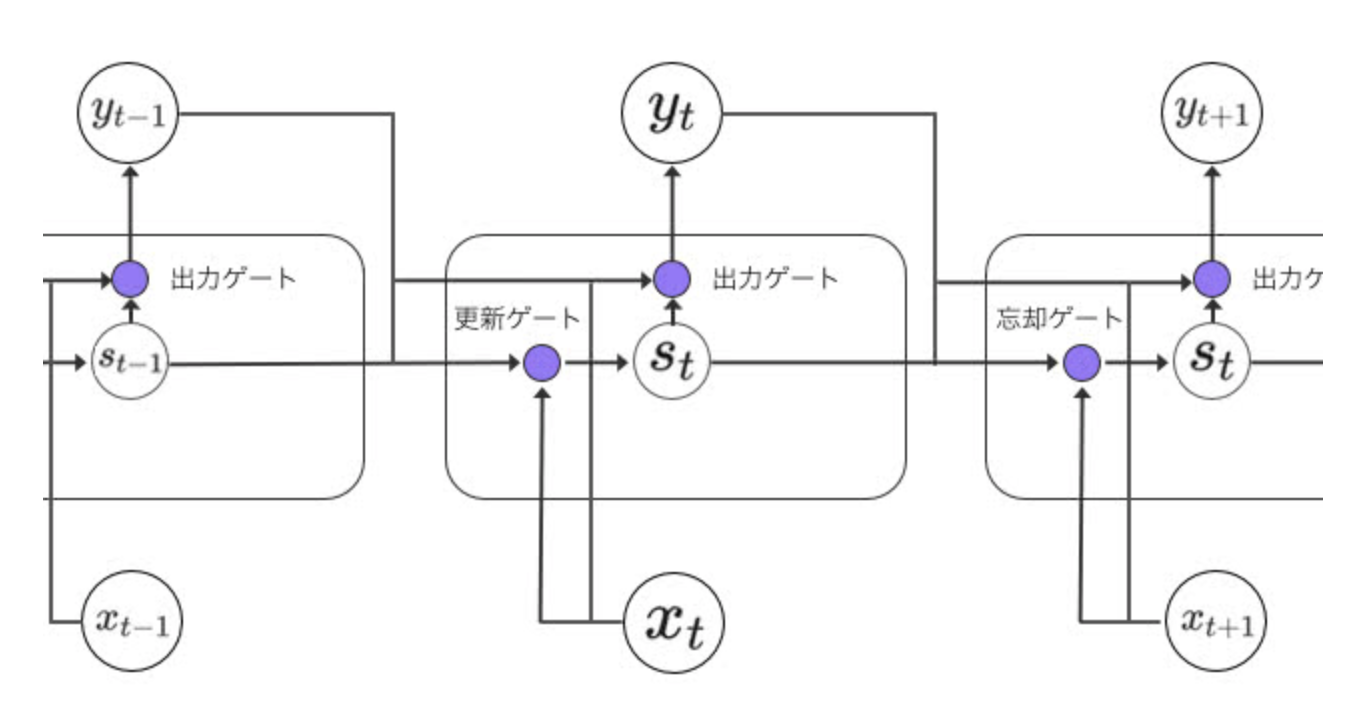

In [20]:
from keras.layers import GRU

print('Build model...')
model3 = Sequential()
model3.add(Embedding(max_features, 128))  #Embedding(語彙数, 分散ベクトルの次元数, 文書の次元数))
model3.add(GRU(128, dropout=0.2, recurrent_dropout=0.2))
model3.add(Dense(1, activation='sigmoid'))

model3.summary()

Build model...
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 128)         2560000   
_________________________________________________________________
gru_1 (GRU)                  (None, 128)               98688     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 129       
Total params: 2,658,817
Trainable params: 2,658,817
Non-trainable params: 0
_________________________________________________________________


In [21]:
model3.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model3.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=10,
          validation_data=(x_test, y_test))
score, acc = model3.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 130s 5ms/step - loss: 0.4770 - acc: 0.7650 - val_loss: 0.4108 - val_acc: 0.8181
Epoch 2/10
25000/25000 [==============================] - 128s 5ms/step - loss: 0.2936 - acc: 0.8796 - val_loss: 0.3533 - val_acc: 0.8448
Epoch 3/10
25000/25000 [==============================] - 127s 5ms/step - loss: 0.1857 - acc: 0.9311 - val_loss: 0.4375 - val_acc: 0.8292
Epoch 4/10
25000/25000 [==============================] - 126s 5ms/step - loss: 0.1083 - acc: 0.9617 - val_loss: 0.5190 - val_acc: 0.8249
Epoch 5/10
25000/25000 [==============================] - 126s 5ms/step - loss: 0.0632 - acc: 0.9782 - val_loss: 0.6301 - val_acc: 0.8213
Epoch 6/10
25000/25000 [==============================] - 128s 5ms/step - loss: 0.0388 - acc: 0.9869 - val_loss: 0.8114 - val_acc: 0.8032
Epoch 7/10
25000/25000 [==============================] - 129s 5ms/step - loss: 0.0284 - acc: 0.9907 - val_loss: 

## ConvLSTM2D

In [3]:
from keras.layers.convolutional import Conv3D
from keras.layers.convolutional_recurrent import ConvLSTM2D
from keras.layers.normalization import BatchNormalization
import numpy as np
import pylab as plt

seq = Sequential()
seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   input_shape=(None, 40, 40, 1),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(Conv3D(filters=1, kernel_size=(3, 3, 3),
               activation='sigmoid',
               padding='same', data_format='channels_last'))
seq.compile(loss='binary_crossentropy', optimizer='adadelta')


seq.summary()







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_lst_m2d_1 (ConvLSTM2D)  (None, None, 40, 40, 40)  59200     
_________________________________________________________________
batch_normalization_1 (Batch (None, None, 40, 40, 40)  160       
_________________________________________________________________
conv_lst_m2d_2 (ConvLSTM2D)  (None, None, 40, 40, 40)  115360    
_________________________________________________________________
batch_normalization_2 (Batch (None, None, 40, 40, 40)  160       
_________________________________________________________________
conv_lst_m2d_3 (ConvLSTM2D)  (None, None, 40, 40, 40)  115360    
_________________________________________________________________
batch_normalization_3 (Batch (None, None, 40, 40, 40)  160       
____________________




Train on 950 samples, validate on 50 samples
Epoch 1/20





950/950 [==============================] - 64s 67ms/step - loss: 0.2493 - val_loss: 0.0600
Epoch 2/20
950/950 [==============================] - 47s 50ms/step - loss: 0.0198 - val_loss: 0.0153
Epoch 3/20
950/950 [==============================] - 47s 50ms/step - loss: 0.0137 - val_loss: 0.0055
Epoch 4/20
950/950 [==============================] - 47s 50ms/step - loss: 0.0020 - val_loss: 0.0019
Epoch 5/20
950/950 [==============================] - 47s 50ms/step - loss: 9.8136e-04 - val_loss: 0.0011
Epoch 6/20
950/950 [==============================] - 47s 50ms/step - loss: 7.0131e-04 - val_loss: 6.3132e-04
Epoch 7/20
950/950 [==============================] - 47s 50ms/step - loss: 5.3385e-04 - val_loss: 4.4363e-04
Epoch 8/20
950/950 [==============================] - 47s 50ms/step - loss: 4.5939e-04 - val_loss: 3.9304e-04
Epoch 9/20
950/950 [==============================] - 47s 50ms/step - loss: 3.9908e-04 - val_loss: 3.68

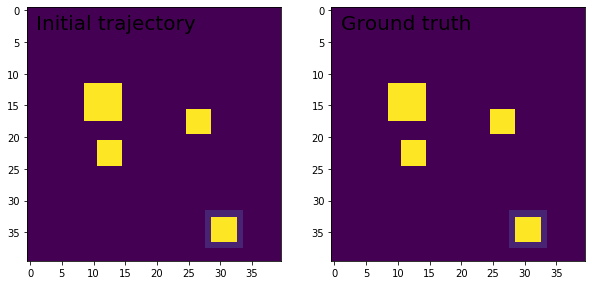

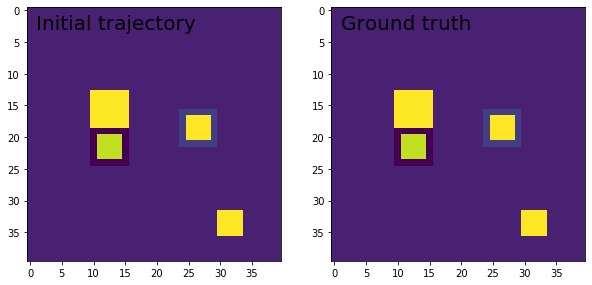

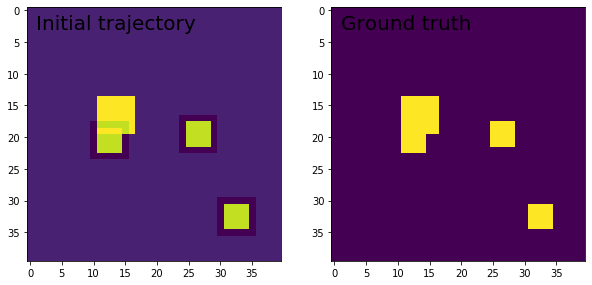

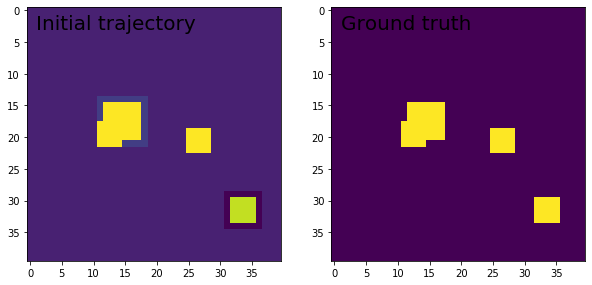

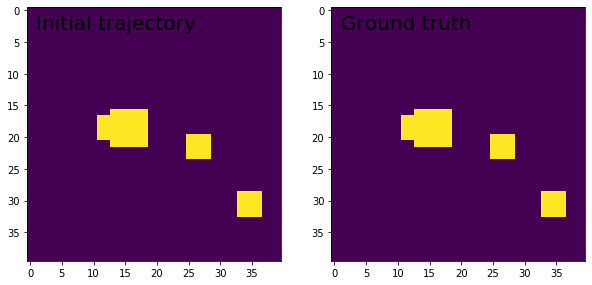

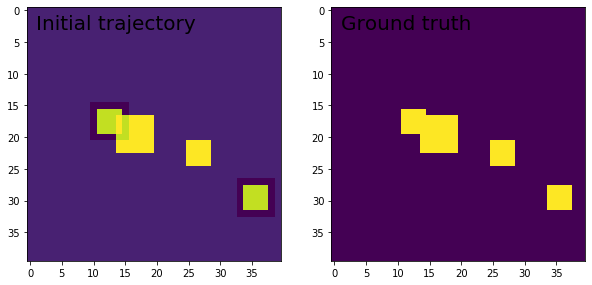

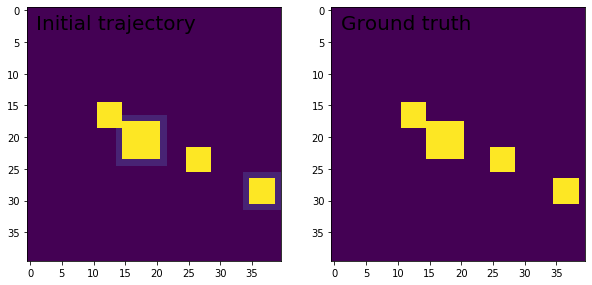

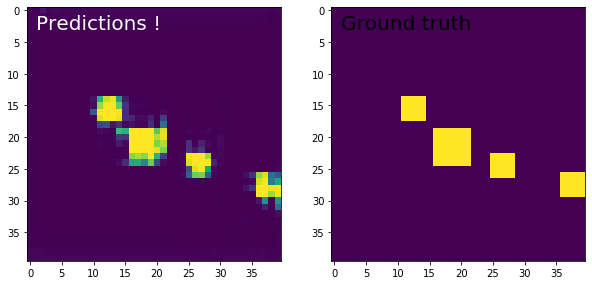

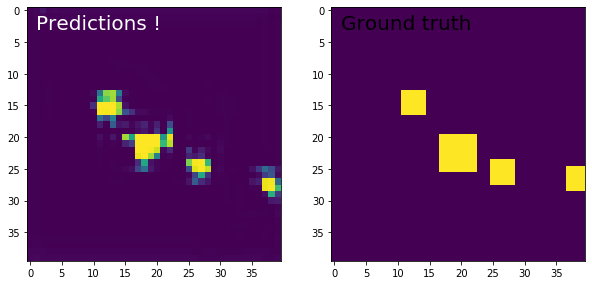

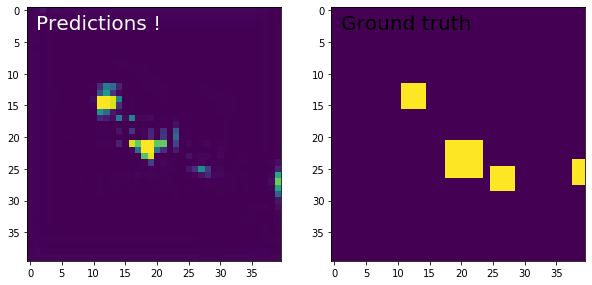

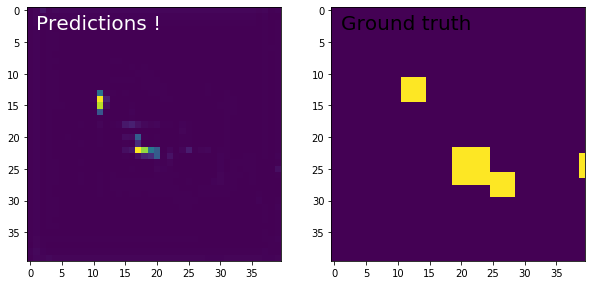

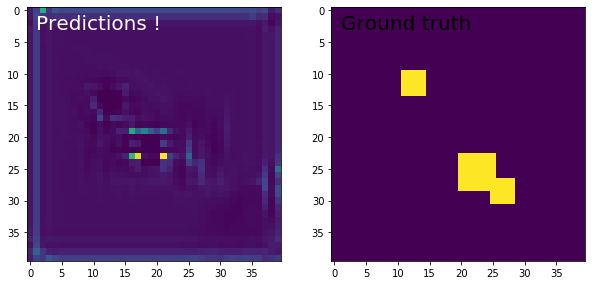

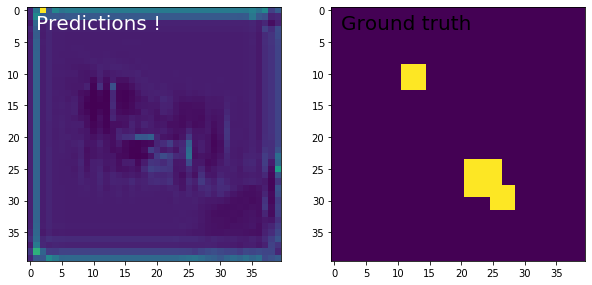

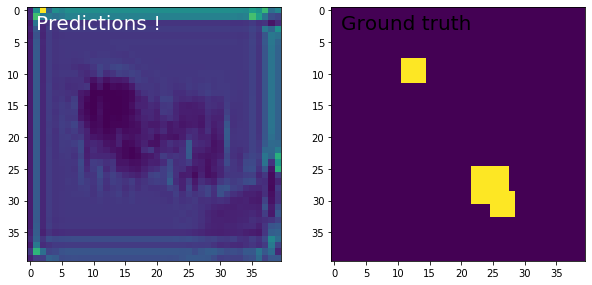

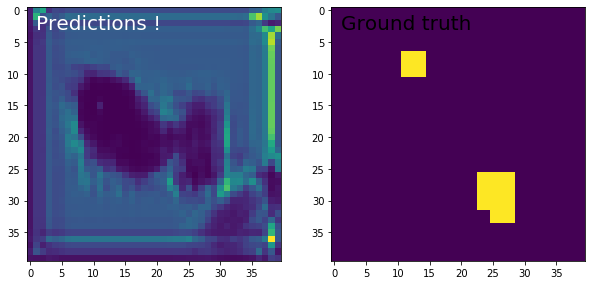

In [4]:
# Artificial data generation:
# Generate movies with 3 to 7 moving squares inside.
# The squares are of shape 1x1 or 2x2 pixels,
# which move linearly over time.
# For convenience we first create movies with bigger width and height (80x80)
# and at the end we select a 40x40 window.

def generate_movies(n_samples=1200, n_frames=15):
    row = 80
    col = 80
    noisy_movies = np.zeros((n_samples, n_frames, row, col, 1), dtype=np.float)
    shifted_movies = np.zeros((n_samples, n_frames, row, col, 1),
                              dtype=np.float)

    for i in range(n_samples):
        # Add 3 to 7 moving squares
        n = np.random.randint(3, 8)

        for j in range(n):
            # Initial position
            xstart = np.random.randint(20, 60)
            ystart = np.random.randint(20, 60)
            # Direction of motion
            directionx = np.random.randint(0, 3) - 1
            directiony = np.random.randint(0, 3) - 1

            # Size of the square
            w = np.random.randint(2, 4)

            for t in range(n_frames):
                x_shift = xstart + directionx * t
                y_shift = ystart + directiony * t
                noisy_movies[i, t, x_shift - w: x_shift + w,
                             y_shift - w: y_shift + w, 0] += 1

                # Make it more robust by adding noise.
                # The idea is that if during inference,
                # the value of the pixel is not exactly one,
                # we need to train the network to be robust and still
                # consider it as a pixel belonging to a square.
                if np.random.randint(0, 2):
                    noise_f = (-1)**np.random.randint(0, 2)
                    noisy_movies[i, t,
                                 x_shift - w - 1: x_shift + w + 1,
                                 y_shift - w - 1: y_shift + w + 1,
                                 0] += noise_f * 0.1

                # Shift the ground truth by 1
                x_shift = xstart + directionx * (t + 1)
                y_shift = ystart + directiony * (t + 1)
                shifted_movies[i, t, x_shift - w: x_shift + w,
                               y_shift - w: y_shift + w, 0] += 1

    # Cut to a 40x40 window
    noisy_movies = noisy_movies[::, ::, 20:60, 20:60, ::]
    shifted_movies = shifted_movies[::, ::, 20:60, 20:60, ::]
    noisy_movies[noisy_movies >= 1] = 1
    shifted_movies[shifted_movies >= 1] = 1
    return noisy_movies, shifted_movies

# Train the network
noisy_movies, shifted_movies = generate_movies(n_samples=1200)
seq.fit(noisy_movies[:1000], shifted_movies[:1000], batch_size=10,
        epochs=20, validation_split=0.05)

# Testing the network on one movie
# feed it with the first 7 positions and then
# predict the new positions
which = 1004
track = noisy_movies[which][:7, ::, ::, ::]

for j in range(16):
    new_pos = seq.predict(track[np.newaxis, ::, ::, ::, ::])
    new = new_pos[::, -1, ::, ::, ::]
    track = np.concatenate((track, new), axis=0)


# And then compare the predictions
# to the ground truth
track2 = noisy_movies[which][::, ::, ::, ::]
for i in range(15):
    fig = plt.figure(figsize=(10, 5))

    ax = fig.add_subplot(121)

    if i >= 7:
        ax.text(1, 3, 'Predictions !', fontsize=20, color='w')
    else:
        ax.text(1, 3, 'Initial trajectory', fontsize=20)

    toplot = track[i, ::, ::, 0]

    plt.imshow(toplot)
    ax = fig.add_subplot(122)
    plt.text(1, 3, 'Ground truth', fontsize=20)

    toplot = track2[i, ::, ::, 0]
    if i >= 2:
        toplot = shifted_movies[which][i - 1, ::, ::, 0]

    plt.imshow(toplot)
    plt.savefig('%i_animate.png' % (i + 1))

## 他のモデル

- RNN
  - Cellモデルのwrapperクラス

### Cellモデルについて
- SimpleRNNCell
- GRUCell
- LSTMCell

など、Cellと末尾についたモデルは、多層RNNモデルを組む際に、RNNの基礎単位であるセルをwrapperとしてまとめることができる。つまり、以下は同じ実装である。

  - tf.keras.layers.RNN(LSTMCell(10))
  - tf.keras.layers.LSTM(10)

>>RNN系のモジュールは出力ユニット数を指定することで、あとはtimestep分の拡張はよしなにやってくれるようになっていますが「timestepごとにある計算をしてからセルに入力をしたい」というような場合（例えば出力に前時刻のAttentionを結合したいとか）にはそのままでは不便です。forループで時刻分の入力を繰り返すという方法もありますが、速度面での懸念が残ります。このような場合にはLSTMCellを利用して、自分でRNNネットワークを定義してあげるのがいいでしょう

https://webcache.googleusercontent.com/search?q=cache:tbjtCPY7YPIJ:https://www.ryknd.net/issues/archives/119+&cd=4&hl=ja&ct=clnk&gl=jp&client=safari



https://takoroy-ai.hatenadiary.jp/entry/2018/06/10/203531







- StackedRNNCells

多層RNNを単一のcellのようにするためのラッパー
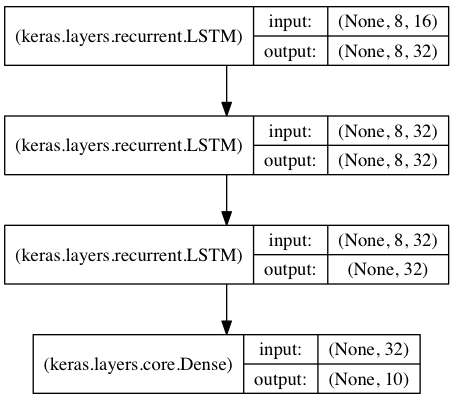

以下のモデルは、ベースのモデルのGPU使用バージョンである。通常モデルより高速に動作する。

- CuDNNGRU
- CuDNNLSTM

<参考>
http://deeplearning.hatenablog.com/entry/neural_machine_translation_theory